<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Bengal/congressBengal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 404 (delta 68), reused 20 (delta 4), pack-reused 231
Receiving objects: 100% (404/404), 19.51 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [117]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress bengal"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('congress_bengal.csv',index = False)

Streaming output truncated to the last 5000 lines.
174
2020-11-19 14:36:02
1329433256110878720
False
Every week, West Bengal Congress protests, hitting streets with massive crowd, but media is totally ignoring it. 

Congress is fighting hard in West Bengal, media is not showing it, so that the narrative that Congress is not serious, can survive @INCWestBengal #CongressForBengal https://t.co/ZkKmMV6blZ
SM_Bishnoi
India
Twitter for Android
2
1405
850
0
<--------------------------------------------------->
175
2020-11-19 14:25:27
1329430590379094017
False
@Sisirkumardatt3 Adhir is the only Congress representative in the state. And the party is so strong that they have to depend on CPM to fight TMC or BJP. Have nothing left for congress in Bengal since 1977. Then why so much galabaji...
chak_somesh

Twitter for Android
0
11
58
0
<--------------------------------------------------->
176
2020-11-19 13:55:12
1329422980800151553
False
West Bengal Assembly Elections  coming soon. Interesting  t

In [119]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       528 non-null    datetime64[ns]
 1   Tweet_id   528 non-null    int64         
 2   Verified   528 non-null    bool          
 3   Tweet      528 non-null    object        
 4   User       528 non-null    object        
 5   Location   528 non-null    object        
 6   Source     528 non-null    object        
 7   Likes      528 non-null    int64         
 8   Followers  528 non-null    int64         
 9   Following  528 non-null    int64         
 10  Retweets   528 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 41.9+ KB


In [121]:
df.shape

(528, 11)

In [122]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [123]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [124]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [125]:
df['Source'].value_counts()

Twitter for Android               271
Twitter Web App                   159
Twitter for iPhone                 54
TweetDeck                          10
IFTTT                               6
Hootsuite Inc.                      4
Twitter for iPad                    3
Twitter Media Studio - LiveCut      2
Rajneeti News                       2
SocialFlow                          2
Sarabangla                          2
Twitter Media Studio                2
ClarionIndia                        1
Jenkers Eng Posting                 1
Hocalwire Social Share              1
Mobile Web (M2)                     1
Sputnik v2.0                        1
WordPress.com                       1
NDTVfeed                            1
Stray Animals Austin                1
Blog2Social APP                     1
namPublisher                        1
Republicworld                       1
Name: Source, dtype: int64

In [126]:
df['Location'].nunique()

181

In [127]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

528

In [128]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


526

In [129]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [130]:
df['Tweet'].duplicated().sum()

2

In [131]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(526, 11)

In [134]:
df['Tweet'].duplicated().sum()

0

In [135]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [136]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [137]:
df.shape

(526, 12)

In [138]:
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1      @ReallySwara We don't have proof of it but  Mu...
2      @manickamtagore Congress Calling Trinamool Con...
3      While Sonia ghandi and @RahulGandhi is holiday...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522    @Woolgatherer86 @Ateendriyo @INCIndia Actually...
523    Congress Pakistan minority appeasement vote ba...
524    @RahulGandhi In West Bengal elections in May 2...
525    @gauravsabnis You missed a couple\n\n- Dude he...
Name: Processed_Tweet, Length: 526, dtype: object

In [139]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1      @ReallySwara We don't have proof of it but  Mu...
2      @manickamtagore Congress Calling Trinamool Con...
3      While Sonia ghandi and @RahulGandhi is holiday...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522    @Woolgatherer86 @Ateendriyo @INCIndia Actually...
523    Congress Pakistan minority appeasement vote ba...
524    @RahulGandhi In West Bengal elections in May 2...
525    @gauravsabnis You missed a couple\n\n- Dude he...
Name: Processed_Tweet, Length: 526, dtype: object

In [140]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1        We don't have proof of it but  Muslims of Un...
2        Congress Calling Trinamool Congress Is B Tea...
3      While Sonia ghandi and   is holidaying,   visi...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522          Actually it is Ulta\nCongress is in alli...
523    Congress Pakistan minority appeasement vote ba...
524      In West Bengal elections in May 2020\n1.Go s...
525      You missed a couple\n\n- Dude he ratted out ...
Name: Processed_Tweet, Length: 526, dtype: object

In [142]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1        We don't have proof of it but  Muslims of Un...
2        Congress Calling Trinamool Congress Is B Tea...
3      While Sonia ghandi and   is holidaying,   visi...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522          Actually it is Ulta\nCongress is in alli...
523    Congress Pakistan minority appeasement vote ba...
524      In West Bengal elections in May 2020\n1.Go s...
525      You missed a couple\n\n- Dude he ratted out ...
Name: Processed_Tweet, Length: 526, dtype: object

In [143]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1        We don't have proof of it but  Muslims of Un...
2        Congress Calling Trinamool Congress Is B Tea...
3      While Sonia ghandi and   is holidaying,   visi...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522          Actually it is Ulta\nCongress is in alli...
523    Congress Pakistan minority appeasement vote ba...
524      In West Bengal elections in May 2020\n1.Go s...
525      You missed a couple\n\n- Dude he ratted out ...
Name: Processed_Tweet, Length: 526, dtype: object

In [144]:
!pip install tweet-preprocessor

In [145]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Of The 'Many Faces' to Represent Congress-Left...
1      We don't have proof of it but Muslims of Unite...
2      Congress Calling Trinamool Congress Is B Team ...
3      While Sonia ghandi and is holidaying, visits s...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes, with EVM BJP is unconquerable. BJP is now...
522    Actually it is UltaCongress is in alliance wit...
523    Congress Pakistan minority appeasement vote ba...
524    In West Bengal elections in May .Go solo2.Cong...
525    You missed a couple- Dude he ratted out Congre...
Name: Processed_Tweet, Length: 526, dtype: object

In [146]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Of The  Many Faces  to Represent Congress Left...
1      We don t have proof of it but Muslims of Unite...
2      Congress Calling Trinamool Congress Is B Team ...
3      While Sonia ghandi and is holidaying  visits s...
4      Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...
                             ...                        
521    Yes  with EVM BJP is unconquerable  BJP is now...
522    Actually it is UltaCongress is in alliance wit...
523    Congress Pakistan minority appeasement vote ba...
524    In West Bengal elections in May  Go solo  Cong...
525    You missed a couple  Dude he ratted out Congre...
Name: Processed_Tweet, Length: 526, dtype: object

In [147]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      of the  many faces  to represent congress left...
1      we don t have proof of it but muslims of unite...
2      congress calling trinamool congress is b team ...
3      while sonia ghandi and is holidaying  visits s...
4      jo vote dene wala bhi hoga adhir chowdhary ko ...
                             ...                        
521    yes  with evm bjp is unconquerable  bjp is now...
522    actually it is ultacongress is in alliance wit...
523    congress pakistan minority appeasement vote ba...
524    in west bengal elections in may  go solo  cong...
525    you missed a couple  dude he ratted out congre...
Name: Processed_Tweet, Length: 526, dtype: object

In [148]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'should contest together  bengal seems to reward congress more seats in alliance than the left '

In [149]:
df['User'].value_counts()

sakibalamIYC       8
bedesiboys         5
Rajaban74609782    5
Satyanewshi        5
TheBombayBombil    5
                  ..
kkrao3107K         1
arsr9178           1
basjagteraho       1
bholabhandariji    1
shivsahays         1
Name: User, Length: 422, dtype: int64

In [150]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


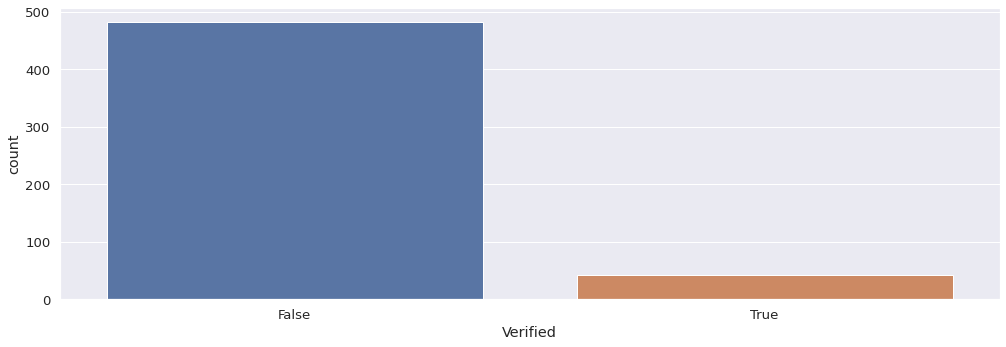

In [151]:
bar = sns.countplot(df['Verified'])

In [153]:
df['Verified'].value_counts()

False    483
True      43
Name: Verified, dtype: int64

In [154]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

IndiaToday         4
ndtv               4
IYCWestBengal      3
CNNnews18          3
TheQuint           3
republic           3
DailyO_            3
the_hindu          2
ttindia            2
Outlookindia       2
TheDailyPioneer    1
DeccanHerald       1
IndianExpress      1
TimesNow           1
Sootradhar         1
SudhanshuTrived    1
ndtvvideos         1
ndtvfeed           1
news18dotcom       1
firstpost          1
RohanV             1
Aagan86            1
EconomicTimes      1
JhaSanjay          1
Name: User, dtype: int64

In [155]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 23, 16: 72, 17: 56, 18: 103, 19: 123, 20: 77, 21: 72})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

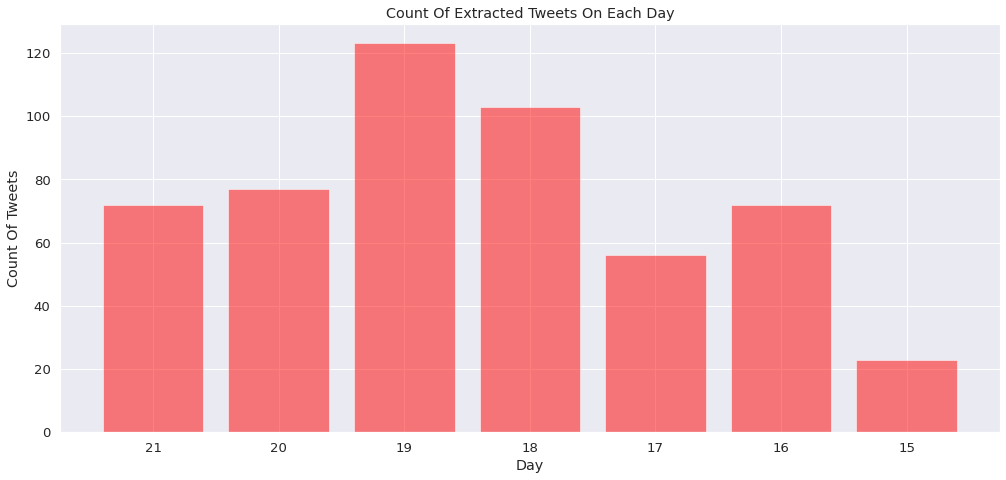

In [156]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [157]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 1,
         1: 8,
         2: 13,
         3: 12,
         4: 23,
         5: 19,
         6: 37,
         7: 35,
         8: 34,
         9: 30,
         10: 18,
         11: 39,
         12: 32,
         13: 36,
         14: 44,
         15: 34,
         16: 27,
         17: 27,
         18: 30,
         19: 10,
         20: 6,
         21: 4,
         22: 1,
         23: 6})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

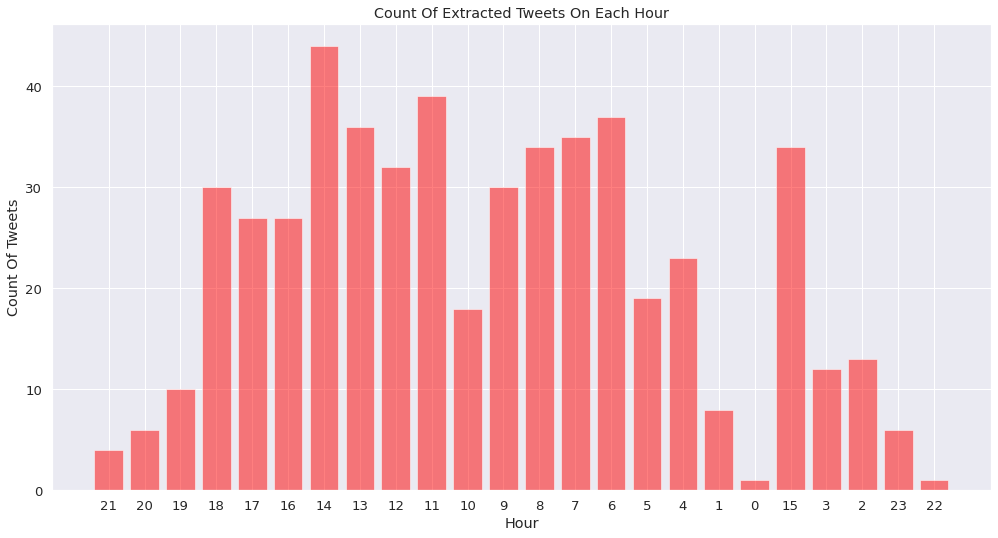

In [158]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [159]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [160]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['be', 'down', 'after', 'during', 'he', 'o', 'no', "haven't", 'up', "mustn't", 'nor', 'it', 'yourselves', 'himself', 'same', 'out', 'herself', 'of', 'more', 'above', "couldn't", 'd', 'most', 'mustn', 'she', "shan't", 'both', 'we', 'his', 'our', 'than', 'between', 'but', 'them', 'with', 'was', 'should', 'needn', 'my', 'against', "you'll", "needn't", 'few', 'about', 'so', 'if', 'through', 's', 'yourself', 'your', 'very', 'now', 'haven', 'such', 'yours', 'have', 'when', 'they', 'were', 'itself', 'this', 'll', 'myself', 'what', 'to', 'do', 'once', "didn't", 'that', 'ours', "you're", "won't", 'him', 'too', 'or', 'the', 'am', 'you', 'being', 'shan', "you'd", 'where', 'wouldn', 'again', 'did', 'mightn', 'into', 'does', 'ourselves', 'its', 'will', 'until', 'own', "you've", "aren't", 'off', 'can', 'at', 'some', 'didn', 'won', 're', 'i', "that'll", 'a', 'an', 't', 'in', 'because', "hadn't", 'hers', "doesn't", "weren't", "shouldn't", "she's", 'is', "isn't", 'all', "wouldn't", 'not', 'any', 'ain',

In [162]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      many faces represent congress left alliance be...
1      proof muslims united provinces bihar bengal bo...
2      congress calling trinamool congress b team bjp...
3      sonia ghandi holidaying visits state tamil nad...
4      jo vote dene wala bhi hoga adhir chowdhary ko ...
                             ...                        
521    yes evm bjp unconquerable bjp unpopular politi...
522    actually ultacongress alliance communists beng...
523    congress pakistan minority appeasement vote ba...
524    west bengal elections may go solo congress fig...
525    missed couple dude ratted congress freedom fig...
Name: Processed_Tweet, Length: 526, dtype: object

In [163]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [many, faces, represent, congress, left, allia...
1      [proof, muslims, united, provinces, bihar, ben...
2      [congress, calling, trinamool, congress, b, te...
3      [sonia, ghandi, holidaying, visits, state, tam...
4      [jo, vote, dene, wala, bhi, hoga, adhir, chowd...
                             ...                        
521    [yes, evm, bjp, unconquerable, bjp, unpopular,...
522    [actually, ultacongress, alliance, communists,...
523    [congress, pakistan, minority, appeasement, vo...
524    [west, bengal, elections, may, go, solo, congr...
525    [missed, couple, dude, ratted, congress, freed...
Name: Processed_Tweet, Length: 526, dtype: object

In [164]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [mani, face, repres, congress, left, allianc, ...
1      [proof, muslim, unit, provinc, bihar, bengal, ...
2      [congress, call, trinamool, congress, b, team,...
3      [sonia, ghandi, holiday, visit, state, tamil, ...
4      [jo, vote, dene, wala, bhi, hoga, adhir, chowd...
                             ...                        
521    [ye, evm, bjp, unconquer, bjp, unpopular, poli...
522    [actual, ultacongress, allianc, communist, ben...
523    [congress, pakistan, minor, appeas, vote, bank...
524    [west, bengal, elect, may, go, solo, congress,...
525    [miss, coupl, dude, rat, congress, freedom, fi...
Name: Processed_Tweet, Length: 526, dtype: object

In [166]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 21:55:14,1330268561340850178,False,Of The 'Many Faces' to Represent Congress-Left...,seshutatikola,hyderabad,Twitter Web App,0,31,46,0,"[mani, face, repres, congress, left, allianc, ..."
1,2020-11-21 20:19:25,1330244445309186048,False,@ReallySwara We don't have proof of it but Mu...,Golushu53906946,,Twitter Web App,4,49,858,0,"[proof, muslim, unit, provinc, bihar, bengal, ..."
2,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj..."
3,2020-11-21 19:51:32,1330237431401082885,False,While Sonia ghandi and @RahulGandhi is holiday...,Saivinayak123,"calicut,kerala,India",Twitter for Android,0,16,136,0,"[sonia, ghandi, holiday, visit, state, tamil, ..."
4,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari..."
...,...,...,...,...,...,...,...,...,...,...,...,...
521,2020-11-15 15:02:47,1327990437127155714,False,"Yes, with EVM BJP is unconquerable. BJP is now...",Sandeep71121431,"Kolkata, India",Twitter for Android,38,527,221,18,"[evm, bjp, unconquer, bjp, unpopular, polit, p..."
522,2020-11-15 14:02:37,1327975294771163138,False,@Woolgatherer86 @Ateendriyo @INCIndia Actually...,SAMEER_YADV,"Mumbai, India",Twitter for Android,1,143,223,0,"[actual, ultacongress, allianc, communist, ben..."
523,2020-11-15 12:55:21,1327958364840574984,False,Congress Pakistan minority appeasement vote ba...,Girish08755455,,Twitter Web App,0,1,0,0,"[congress, pakistan, minor, appeas, vote, bank..."
524,2020-11-15 12:44:49,1327955715131019266,False,@RahulGandhi In West Bengal elections in May 2...,Yumn62722591,,Twitter for Android,2,211,590,1,"[west, bengal, elect, may, solo, congress, fig..."


In [167]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

9940

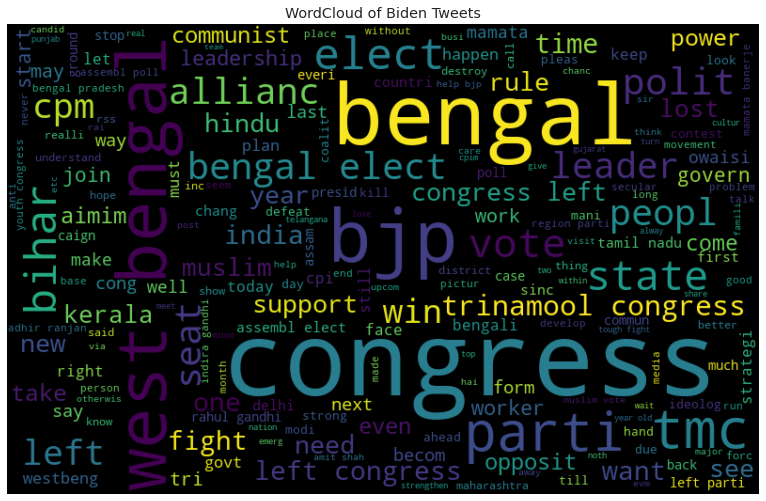

In [168]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

In [169]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

526

In [170]:
len(text)

9940

In [171]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 271
Negative Tweets: 90
Neutral Tweets 165


In [172]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [173]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [174]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.879,0.121,0.2960
2,0.000,1.000,0.000,0.0000
3,0.092,0.805,0.103,0.0772
4,0.088,0.912,0.000,-0.4019
...,...,...,...,...
521,0.000,0.913,0.087,0.3182
522,0.302,0.698,0.000,-0.3818
523,0.175,0.825,0.000,-0.6705
524,0.261,0.562,0.177,-0.2500


In [175]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.000,0.879,0.121,0.2960,Positive
2,0.000,1.000,0.000,0.0000,Neutral
3,0.092,0.805,0.103,0.0772,Positive
4,0.088,0.912,0.000,-0.4019,Negative


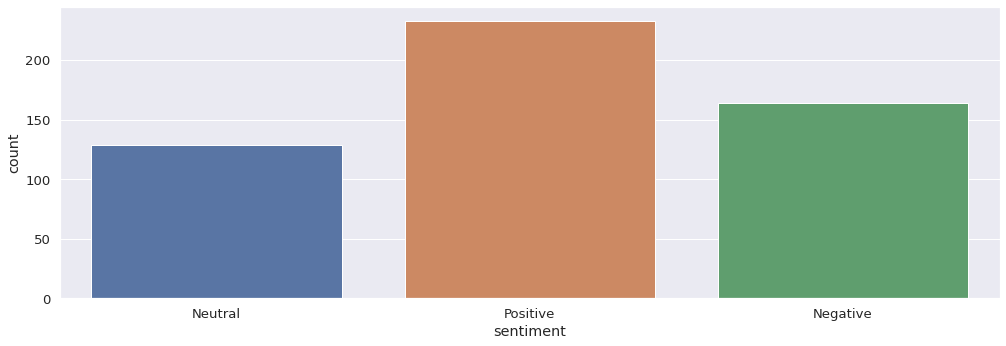

In [176]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [178]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Bengal/congress_bengal.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

938

In [179]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [180]:
word_emotion=dict()
for i in range(0,938):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [181]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

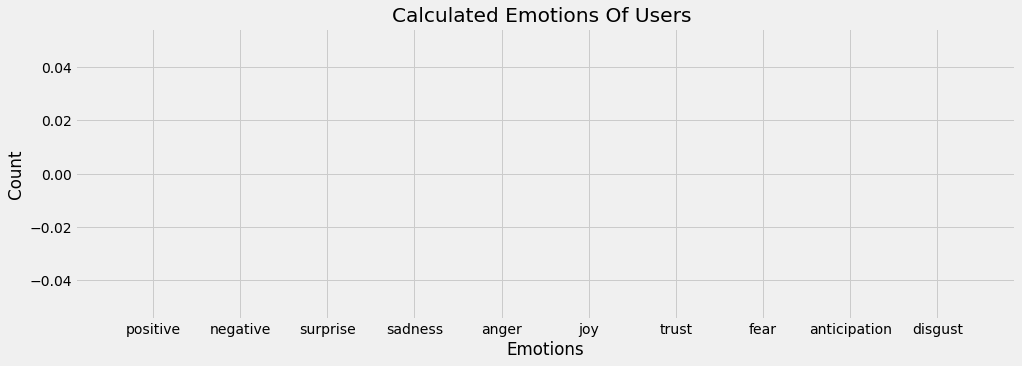

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [182]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [183]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                       173
India                   53
Kolkata, India          20
Mumbai, India           16
New Delhi, India        14
                      ... 
Austin, TX               1
 Hindusthan              1
Planet Earth             1
hyderabad                1
Hyderabad, AP INDIA      1
Name: Location, Length: 180, dtype: int64

In [184]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 21:55:14,1330268561340850178,False,Of The 'Many Faces' to Represent Congress-Left...,seshutatikola,hyderabad,Twitter Web App,0,31,46,0,"[mani, face, repres, congress, left, allianc, ...",hyderabad
1,2020-11-21 20:19:25,1330244445309186048,False,@ReallySwara We don't have proof of it but Mu...,Golushu53906946,,Twitter Web App,4,49,858,0,"[proof, muslim, unit, provinc, bihar, bengal, ...",
2,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India
3,2020-11-21 19:51:32,1330237431401082885,False,While Sonia ghandi and @RahulGandhi is holiday...,Saivinayak123,"calicut,kerala,India",Twitter for Android,0,16,136,0,"[sonia, ghandi, holiday, visit, state, tamil, ...",calicut
4,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari...",Ranchi l New Delhi l Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2020-11-15 15:02:47,1327990437127155714,False,"Yes, with EVM BJP is unconquerable. BJP is now...",Sandeep71121431,"Kolkata, India",Twitter for Android,38,527,221,18,"[evm, bjp, unconquer, bjp, unpopular, polit, p...",Kolkata
522,2020-11-15 14:02:37,1327975294771163138,False,@Woolgatherer86 @Ateendriyo @INCIndia Actually...,SAMEER_YADV,"Mumbai, India",Twitter for Android,1,143,223,0,"[actual, ultacongress, allianc, communist, ben...",Mumbai
523,2020-11-15 12:55:21,1327958364840574984,False,Congress Pakistan minority appeasement vote ba...,Girish08755455,,Twitter Web App,0,1,0,0,"[congress, pakistan, minor, appeas, vote, bank...",
524,2020-11-15 12:44:49,1327955715131019266,False,@RahulGandhi In West Bengal elections in May 2...,Yumn62722591,,Twitter for Android,2,211,590,1,"[west, bengal, elect, may, solo, congress, fig...",


In [185]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [186]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 21:55:14,1330268561340850178,False,Of The 'Many Faces' to Represent Congress-Left...,seshutatikola,hyderabad,Twitter Web App,0,31,46,0,"[mani, face, repres, congress, left, allianc, ...",hyderabad,Neutral,21
1,2020-11-21 20:19:25,1330244445309186048,False,@ReallySwara We don't have proof of it but Mu...,Golushu53906946,,Twitter Web App,4,49,858,0,"[proof, muslim, unit, provinc, bihar, bengal, ...",,Positive,21
2,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India,Neutral,21
3,2020-11-21 19:51:32,1330237431401082885,False,While Sonia ghandi and @RahulGandhi is holiday...,Saivinayak123,"calicut,kerala,India",Twitter for Android,0,16,136,0,"[sonia, ghandi, holiday, visit, state, tamil, ...",calicut,Positive,21
4,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari...",Ranchi l New Delhi l Kolkata,Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


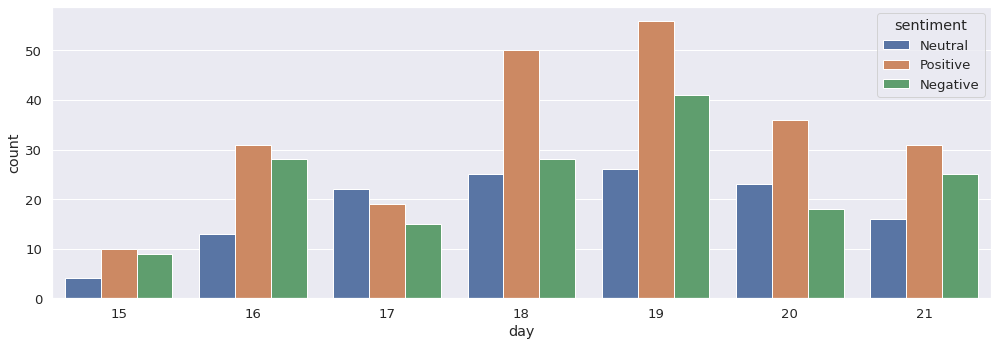

In [187]:
sns.countplot(df['day'],hue = df['sentiment'])

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [192]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 21:55:14,1330268561340850178,False,Of The 'Many Faces' to Represent Congress-Left...,seshutatikola,hyderabad,Twitter Web App,0,31,46,0,"[mani, face, repres, congress, left, allianc, ...",hyderabad,Neutral,21,1
1,2020-11-21 20:19:25,1330244445309186048,False,@ReallySwara We don't have proof of it but Mu...,Golushu53906946,,Twitter Web App,4,49,858,0,"[proof, muslim, unit, provinc, bihar, bengal, ...",,Positive,21,2
2,2020-11-21 20:01:36,1330239963737231366,False,@manickamtagore Congress Calling Trinamool Con...,KumarReddy272,India,Twitter for Android,1,21,133,0,"[congress, call, trinamool, congress, team, bj...",India,Neutral,21,1
3,2020-11-21 19:51:32,1330237431401082885,False,While Sonia ghandi and @RahulGandhi is holiday...,Saivinayak123,"calicut,kerala,India",Twitter for Android,0,16,136,0,"[sonia, ghandi, holiday, visit, state, tamil, ...",calicut,Positive,21,2
4,2020-11-21 19:19:22,1330229333860954119,False,Jo vote dene wala bhi hoga ADHIR CHOWDHARY ko ...,JharkhandVikas,Ranchi l New Delhi l Kolkata,Twitter for iPhone,0,901,234,0,"[vote, dene, wala, bhi, hoga, adhir, chowdhari...",Ranchi l New Delhi l Kolkata,Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2020-11-15 15:02:47,1327990437127155714,False,"Yes, with EVM BJP is unconquerable. BJP is now...",Sandeep71121431,"Kolkata, India",Twitter for Android,38,527,221,18,"[evm, bjp, unconquer, bjp, unpopular, polit, p...",Kolkata,Positive,15,2
522,2020-11-15 14:02:37,1327975294771163138,False,@Woolgatherer86 @Ateendriyo @INCIndia Actually...,SAMEER_YADV,"Mumbai, India",Twitter for Android,1,143,223,0,"[actual, ultacongress, allianc, communist, ben...",Mumbai,Negative,15,0
523,2020-11-15 12:55:21,1327958364840574984,False,Congress Pakistan minority appeasement vote ba...,Girish08755455,,Twitter Web App,0,1,0,0,"[congress, pakistan, minor, appeas, vote, bank...",,Negative,15,0
524,2020-11-15 12:44:49,1327955715131019266,False,@RahulGandhi In West Bengal elections in May 2...,Yumn62722591,,Twitter for Android,2,211,590,1,"[west, bengal, elect, may, solo, congress, fig...",,Negative,15,0


In [193]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [195]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [196]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6582278481012658
Precision Score:  0.6582278481012658
Recall Score:  0.6582278481012658
F1 Score:  0.6582278481012658


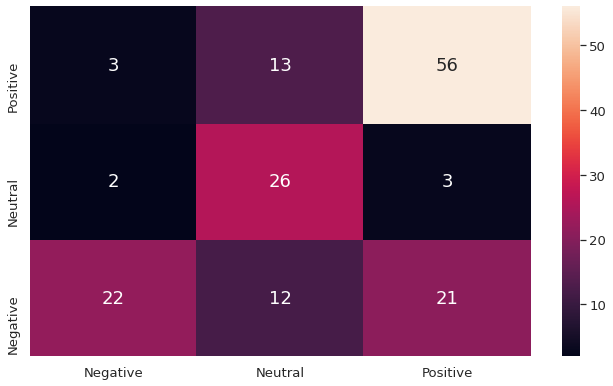

In [197]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [198]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [199]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [200]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4674924924924925
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [201]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.44936708860759494
Precision Score:  0.44936708860759494
Recall Score:  0.44936708860759494
F1 Score:  0.44936708860759494


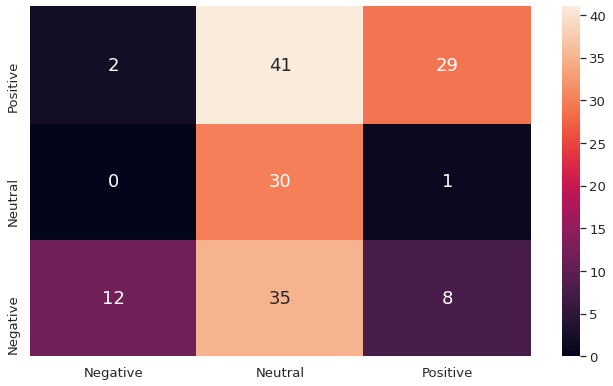

In [202]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [203]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [204]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6455696202531646
Precision Score:  0.6455696202531646
Recall Score:  0.6455696202531646
F1 Score:  0.6455696202531646


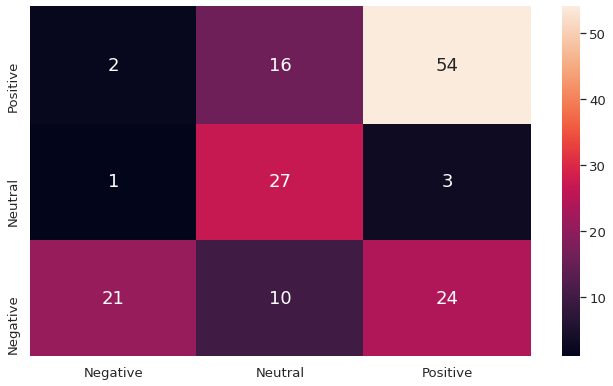

In [205]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [206]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [207]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=18, criterion=entropy, score=0.541, total=   0.9s
[CV] n_estimators=400, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, max_depth=18, criterion=entropy, score=0.514, total=   0.9s
[CV] n_estimators=400, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=400, max_depth=18, criterion=entropy, score=0.541, total=   1.0s
[CV] n_estimators=400, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=400, max_depth=18, criterion=entropy, score=0.493, total=   1.0s
[CV] n_estimators=400, max_depth=18, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=400, max_depth=18, criterion=entropy, score=0.521, total=   1.0s
[CV] n_estimators=900, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, max_depth=1, criterion=entropy, score=0.446, total=   1.4s
[CV] n_estimators=900, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.1s remaining:    0.0s


[CV]  n_estimators=900, max_depth=1, criterion=entropy, score=0.432, total=   1.3s
[CV] n_estimators=900, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.5s remaining:    0.0s


[CV]  n_estimators=900, max_depth=1, criterion=entropy, score=0.432, total=   1.4s
[CV] n_estimators=900, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.9s remaining:    0.0s


[CV]  n_estimators=900, max_depth=1, criterion=entropy, score=0.438, total=   1.8s
[CV] n_estimators=900, max_depth=1, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s remaining:    0.0s


[CV]  n_estimators=900, max_depth=1, criterion=entropy, score=0.438, total=   2.1s
[CV] n_estimators=200, max_depth=9, criterion=gini ...................
[CV]  n_estimators=200, max_depth=9, criterion=gini, score=0.473, total=   0.6s
[CV] n_estimators=200, max_depth=9, criterion=gini ...................
[CV]  n_estimators=200, max_depth=9, criterion=gini, score=0.473, total=   0.6s
[CV] n_estimators=200, max_depth=9, criterion=gini ...................
[CV]  n_estimators=200, max_depth=9, criterion=gini, score=0.486, total=   0.5s
[CV] n_estimators=200, max_depth=9, criterion=gini ...................
[CV]  n_estimators=200, max_depth=9, criterion=gini, score=0.479, total=   0.6s
[CV] n_estimators=200, max_depth=9, criterion=gini ...................
[CV]  n_estimators=200, max_depth=9, criterion=gini, score=0.438, total=   0.4s
[CV] n_estimators=1300, max_depth=3, criterion=gini ..................
[CV]  n_estimators=1300, max_depth=3, criterion=gini, score=0.459, total=   2.1s
[CV] n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


0.5216586449463161
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [208]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5886075949367089
Precision Score:  0.5886075949367089
Recall Score:  0.5886075949367089
F1 Score:  0.5886075949367089


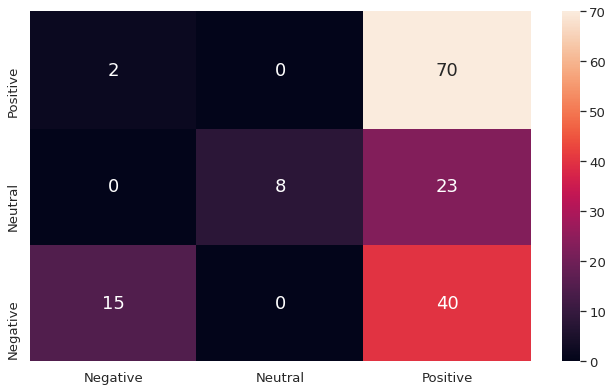

In [209]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [210]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.620253164556962
Precision Score:  0.620253164556962
Recall Score:  0.620253164556962
F1 Score:  0.620253164556962


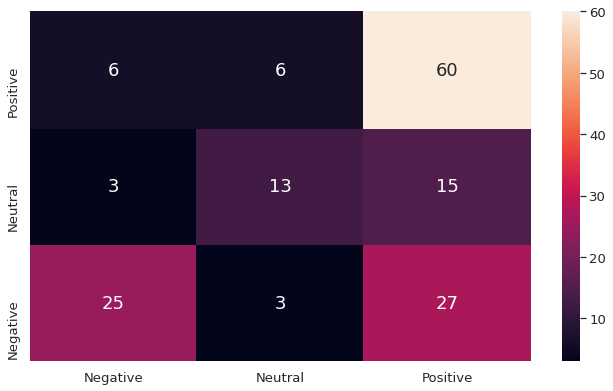

In [211]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [212]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [213]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.590015015015015
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [214]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.620253164556962
Precision Score:  0.620253164556962
Recall Score:  0.620253164556962
F1 Score:  0.620253164556962


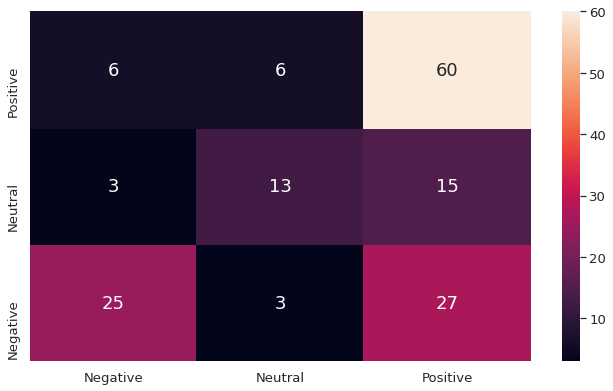

In [215]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

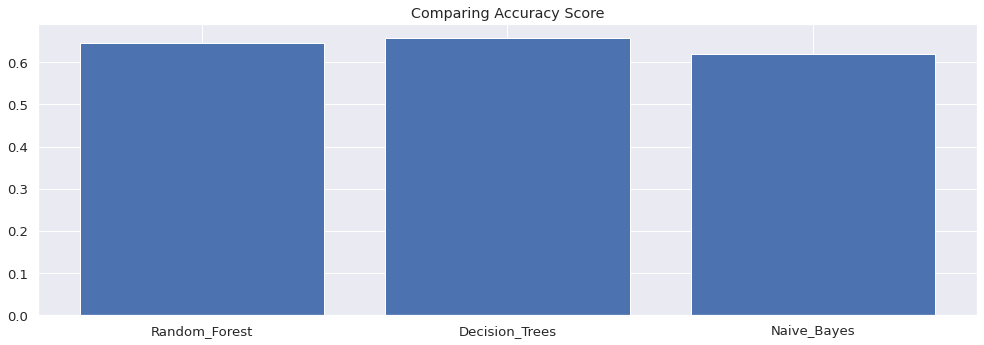

In [216]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

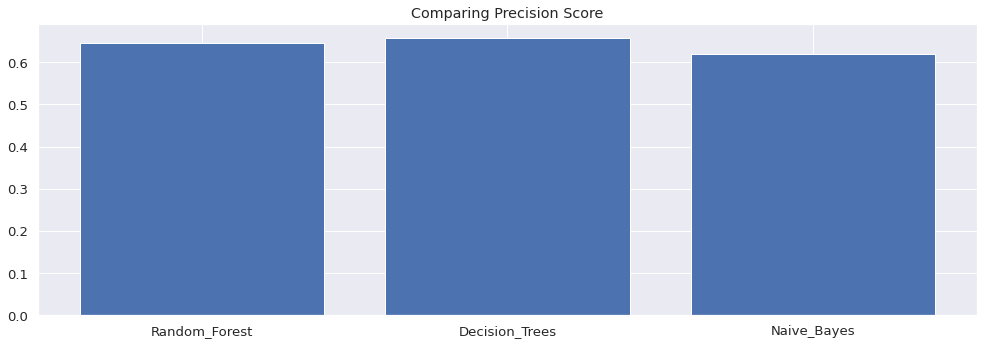

In [217]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

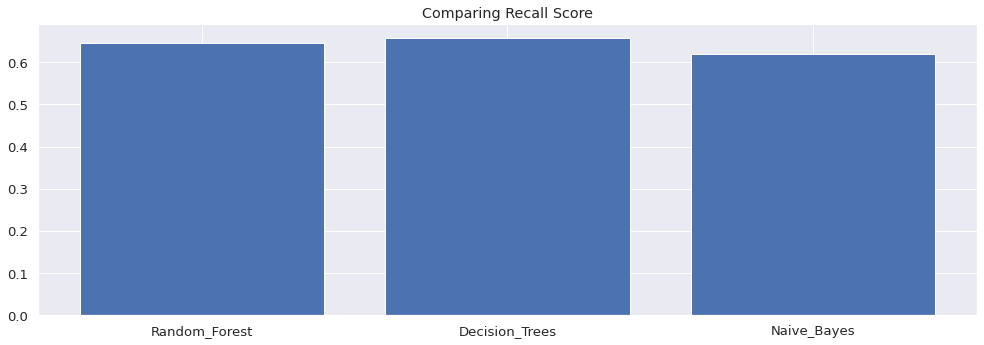

In [218]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

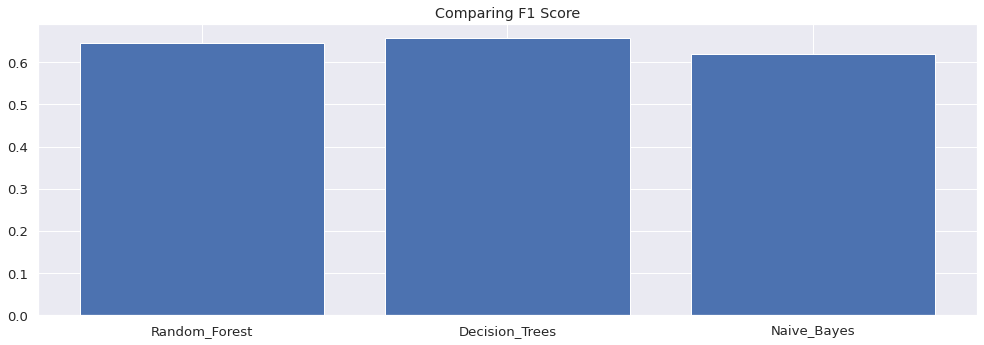

In [219]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()